---
title: Analyzing Disparity Between Users and Journalists Ratings
subtitle: Randomized Shuffling As My First Systematic Analysis
summary: Randomized Shuffling As My First Systematic Analysis
#authors:
#- admin
tags: []
categories: []
date: "2019-02-05T00:00:00Z"
#lastMod: "2019-09-05T00:00:00Z"
featured: true
draft: true

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder. 
image:
  caption: ""
  focal_point: ""
---


## Intro
In this post we analyze and compare [metacritic ratings of best 2019 games](https://www.metacritic.com/browse/games/score/metascore/year/ps4/filtered?year_selected=2019), Given by both the gaming community and professional journalism. It is divided into three sections, namely, _data preprocessing_, _exploratory analysis_, and _systematic test_. I launched a similar post upto _exploratory analysis_ on [this Reddit post](https://www.reddit.com/r/truegaming/comments/ez7oc2/analysing_top_praised_games_by_the_community_not/). Surprisingly, The community shared with me great insights and feedbacks. If you have already seen my notebook on _reddit's post_, Then skip to _systematic test_. There is a summary of each section if you're lazy to read the whole kernel. Check summaries out in _table of contents_ below. On the other extreme, If you are willing to read every detail of the kernel, I provided for you the full sourcecode used in this blog post [here](https://github.com/mostafatouny/disparity-blog-post).

In a nutshell, The goal of this blog post is:

- Analyzing top games got high ratings from professional critics but not from community of users.
- Analyzing top games got high ratings from community of users but not from progessional critics.
- Graph of percentage of games whose disparity between critics and users are low, moderate, or high.
- Do above steps on four platforms, namely, PS4, Xbox One, Switch, and PC. Then we compare them.
- Apply permutation and p-values systematic test on each platforms pairs distributions.

## What I Have Learned From Reddit Community
In this paragraph I shall highlight and review reddit's community comments which I found most useful. I am going to just quote the user's name, and summarize his comment. To see his full comment, just `CTRL+F` his name on reddit's page. After each summary, I spot what I learned, and how analysis could be furtherly improved according to it. However, None of these spots are implemented here.

> **ArtKorvalay**
A gamer who dislikes a game but finds no outrage from the community does not add up his voice. A gamer who moderates a game but finds an outrage from the community adds up a negative voice

We could consider ratings along whether the game is hyped or outraged from the community. In that way, we might reach more accurate analysis.

> **ArtKorvalay**
Some games like _disco elsiym_ gets played by only those who like such genre of games. A humble 2d-graphics like this shall not be played by any casual gamer who gets attracted by marketing and high graphics. So, a gamer who chooses to play it must be a fan of that style. As a result, the game got rated only by those who like it. Hence, ratings are biased.

We could consider ratings along whether a game's marketing budget is high or low. In that way, we might reach more accurate analysis.

> **EoceneMiacid**
_Terminator Resistance_ case study is typical for disparity between users and critics. Have a look [here](https://www.youtube.com/watch?v=H5wi-c0v2wk) how the problem was highlighted by media.

Exploring this case study might reveal new insights as it is typical of the problem of disparity between users and professional critics. We might test our new techniques on this case study and see how our techniques perform up against it. Testing analysis techniques on a case we already know about emphatically shall help us on detecting mistakes in our analysis.

___

## Table of Contents
Preface

- [Preface](#preface)
- [What I Have Learned From Reddit Community](#what-i-have-learned-from-reddit-community)


Data Preprocessing

- [Import Libraries and Local Files](#import-libraries-and-local-files)
- [Read Data](#read-data)
- [Data Cleansing](#data-cleansing)
- [Data Preprocessing Summary](#data-preprocessing-summary)


Exploratory Analysis

- [Compute Disparity (Difference) Between Users and Critics](#compute-disparity-difference-between-users-and-critics)
- [Discretize Disparity Computed Earlier Into Categories](#discretize-disparity-computed-earlier-into-categories)
- [Sort According to Disparity Between Users and Critics](#sort-according-to-disparity-between-users-and-critics)
- [Basic Stats on Disparity Between Users and Critics](#basic-stats-on-disparity-between-users-and-critics)
- [Graphing Disparity Between Users and Critics](#graphing-disparity-between-users-and-critics)
- [Maximum Disparity Between Users and Critics Ratings](#maximum-disparity-between-users-and-critics-ratings)
- [Minimum Disparity Between Users and Critics](#minimum-disparity-between-users-and-critics)
- [Games Which Got Higher Ratings From Users Than From Critics](#games-which-got-higher-ratings-from-users-than-from-critics)
- [Exploratoy Analysis Summary](#exploratoy-analysis-summary)


Systematic Test

- [A Single Permutation Shuffle Based Trial With Histogram & Probability Density Function](#a-single-permutation-shuffle-based-trial-with-histogram-probability-density-function)
- [Permutation Test and P-Value Based Statistical Significance](#permutation-test-and-p-value-based-statistical-significance)
- [Systematic Test Summary](#systematic-test-summary)

___

### Import Libraries and Local Files

In [1]:
# 3rd-party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# local-files
import jsonRW as jsRW
import graphs.pie as pieGraph
import graphs.categoricalHeatmap as categoricalHeatmapGraph
import graphs.groupedBars as groupedBarsGraph
import graphs.histogramPdf as histogramPdfGraph
import transformations.transformations as transform
import transformations.discretizeIntoCategories as discIntCat
import statTests.permutationTest as permTest

___

## Read Data

### Read Local JSON Data Into a Pandas Dataframe

In [2]:
# a map from each platform to its corresponding dataframe
platform_df = {}
# platform names and their corresonding data file names
platformsNames = ['ps4', 'xbox', 'switch', 'pc']
filesNames = ['ps4.csv', 'xbox.csv', 'switch.csv', 'pc.csv']

# for each platform, then 
for name in platformsNames:
    # read its local json file
    metacritic_list = jsRW.readJson(name)
    # parse it as pandas dataframe, then map platform name to it
    platform_df[name] = pd.DataFrame(metacritic_list)

In [3]:
# take a look at a dataframe
platform_df['ps4']

,critic_rating,id,release_date,title,user_rating
0,91,1,"Jul 2, 2019",final fantasy xiv: shadowbringers,8.3
1,91,2,"Feb 26, 2019",nier: automata - game of the yorha edition,8.5
2,91,3,"Jan 25, 2019",resident evil 2,8.8
3,90,4,"Mar 22, 2019",sekiro: shadows die twice,7.9
4,89,5,"Sep 6, 2019",monster hunter: world - iceborne,8.4
...,...,...,...,...,...
335,39,336,"Oct 15, 2019",zombieland: double tap - road trip,4.6
336,37,337,"Mar 5, 2019",left alive,8.3
337,36,338,"Mar 5, 2019",eternity: the last unicorn,3.8
338,31,339,"May 30, 2019",dayz,2.8


___

## Data Cleansing

In [4]:
# drop unneeded columns and re-organize them 
for name in platformsNames:
    platform_df[name] = platform_df[name][['title', 'user_rating', 'critic_rating']]

In [5]:
# take a look at a dataframe, again
platform_df['ps4']

,title,user_rating,critic_rating
0,final fantasy xiv: shadowbringers,8.3,91
1,nier: automata - game of the yorha edition,8.5,91
2,resident evil 2,8.8,91
3,sekiro: shadows die twice,7.9,90
4,monster hunter: world - iceborne,8.4,89
...,...,...,...
335,zombieland: double tap - road trip,4.6,39
336,left alive,8.3,37
337,eternity: the last unicorn,3.8,36
338,dayz,2.8,31


#### remarks
- user_rating must be on the same scale as critic_rating
- data types need to be checked

In [6]:
# check columns data types
platform_df['ps4'].dtypes

title            object
user_rating      object
critic_rating    object
dtype: object

In [7]:
# convert ratings into a numeric value
#      error ahead!
#df['user_rating'] = pd.to_numeric(df['user_rating'])
#df['critic_rating'] = pd.to_numeric(df['critic_rating'])

In [8]:
# get rid of user_rating with value equal to "tbd"

# for each platform
for name in platformsNames:
    # get its dataframe
    df = platform_df[name]
    # get index set in which user_rating is tbd, a non-numeric value
    tbdIndex = df[df['user_rating']=="tbd"].index
    # drop rows specified by indices in which user_rating is tbd
    df = df.drop(labels=tbdIndex, axis='index')
    # set updated data to platform_df
    platform_df[name] = df

In [9]:
# convert ratings to a numeric type

# for each platform
for name in platformsNames:
    # get its dataframe
    df = platform_df[name]
    # convert to a numeric type
    df['user_rating'] = pd.to_numeric(df['user_rating'])
    df['critic_rating'] = pd.to_numeric(df['critic_rating'])
    # set updated data to platform_df
    platform_df[name] = df

In [10]:
# check data types
platform_df['ps4'].dtypes

title             object
user_rating      float64
critic_rating      int64
dtype: object

In [11]:
# user ratings must be on the same scale as critics ratings, so we multiply them by 10

# for each platform
for platformName in platform_df:
    platform_df[platformName]['user_rating'] = platform_df[platformName]['user_rating'] * 10

In [12]:
platform_df['ps4']

,title,user_rating,critic_rating
0,final fantasy xiv: shadowbringers,83.0,91
1,nier: automata - game of the yorha edition,85.0,91
2,resident evil 2,88.0,91
3,sekiro: shadows die twice,79.0,90
4,monster hunter: world - iceborne,84.0,89
...,...,...,...
335,zombieland: double tap - road trip,46.0,39
336,left alive,83.0,37
337,eternity: the last unicorn,38.0,36
338,dayz,28.0,31


___

### Optional: Store Cleaned Data Into a CSV File

In [13]:
"""
# store data to a csv file

# for each platform
for platformName in platform_df:
    # save to a csv file
    platform_df[platformName].to_csv(str(platformName)+'.csv')
"""

"\n# store data to a csv file\n\n# for each platform\nfor platformName in platform_df:\n    # save to a csv file\n    platform_df[platformName].to_csv(str(platformName)+'.csv')\n"

### Data Preprocessing Summary
- Data stored as JSON format are transformed into csv
- Unneded columns are dropped
- Suitable data types are recognized by _pandas_

___

### Compute Disparity (Difference) Between Users and Critics

In [14]:
# for each platform
for name in platform_df:
    # get dataframe of the platform
    df = platform_df[name]
    # for each record, compute distance between user and critic ratings, then set result to a new column
    df['userCritic_difference'] = df.apply(lambda x: abs(x['user_rating']-x['critic_rating']), axis=1)
    # assign updates back to our dataframe
    platform_df[name] = df

In [15]:
platform_df['ps4']

,title,user_rating,critic_rating,userCritic_difference
0,final fantasy xiv: shadowbringers,83.0,91,8.0
1,nier: automata - game of the yorha edition,85.0,91,6.0
2,resident evil 2,88.0,91,3.0
3,sekiro: shadows die twice,79.0,90,11.0
4,monster hunter: world - iceborne,84.0,89,5.0
...,...,...,...,...
335,zombieland: double tap - road trip,46.0,39,7.0
336,left alive,83.0,37,46.0
337,eternity: the last unicorn,38.0,36,2.0
338,dayz,28.0,31,3.0


### Discretize Disparity Computed Earlier Into Categories

In [16]:
# categories names and their corresponding intervals
# category at location x corresponds to interval equal or greater than intervals location x and less than location x + 1
# except for last category, has no end
categories = pd.Series(["low", "moderate", "high", "very_high", "extremely_high"])
intervals_categories = [0, 20, 30, 40, 50]

In [17]:
# compute categories as defined earlier

# loop on platforms
for platformName in platform_df:
    # get dataframe of the platform
    df = platform_df[platformName]
    # add category based on difference just defined
    df['difference_category'] = df.apply(discIntCat.numToCat, axis=1, args=('userCritic_difference', categories, intervals_categories))
    
    # let categories be recognized by pandas
    df['difference_category'] = df['difference_category'].astype("category")
    # re-order categories
    df['difference_category'] = df['difference_category'].cat.set_categories(categories, ordered=True)
    
    
    # assign back to our dataframe
    platform_df[platformName] = df

In [18]:
# take a look after our new columns added
platform_df['ps4']

,title,user_rating,critic_rating,userCritic_difference,difference_category
0,final fantasy xiv: shadowbringers,83.0,91,8.0,low
1,nier: automata - game of the yorha edition,85.0,91,6.0,low
2,resident evil 2,88.0,91,3.0,low
3,sekiro: shadows die twice,79.0,90,11.0,low
4,monster hunter: world - iceborne,84.0,89,5.0,low
...,...,...,...,...,...
335,zombieland: double tap - road trip,46.0,39,7.0,low
336,left alive,83.0,37,46.0,very_high
337,eternity: the last unicorn,38.0,36,2.0,low
338,dayz,28.0,31,3.0,low


### Sort According to Disparity Between Users and Critics

In [19]:
# for each platform
for platformName in platform_df:
    # get platform dataframe
    df = platform_df[platformName]
    # sort it by userCritic_difference
    df = df.sort_values(axis=0, by='userCritic_difference', ascending=False)
    # assign sorted dataframe back to our dataframe
    platform_df[platformName] = df

### Basic Stats on Disparity Between Users and Critics

In [20]:
# for each platform
for platformName in platform_df:
    # print platform name
    print("\n", "on ", platformName)
    # show basic stat
    print(platform_df[platformName]['userCritic_difference'].describe())


 on  ps4
count    310.000000
mean      15.893548
std       13.074530
min        0.000000
25%        5.000000
50%       12.000000
75%       23.000000
max       69.000000
Name: userCritic_difference, dtype: float64

 on  xbox
count    186.000000
mean      14.801075
std       13.192881
min        0.000000
25%        5.000000
50%       11.000000
75%       21.000000
max       69.000000
Name: userCritic_difference, dtype: float64

 on  switch
count    364.000000
mean       6.876374
std        8.741062
min        0.000000
25%        1.750000
50%        4.000000
75%        9.000000
max       58.000000
Name: userCritic_difference, dtype: float64

 on  pc
count    327.000000
mean      13.547401
std       12.322982
min        0.000000
25%        4.000000
50%       10.000000
75%       19.000000
max       63.000000
Name: userCritic_difference, dtype: float64


___

## Categories Size

### Platform x Category 2D Sizes Dataframe

In [21]:
platform_category_size = transform.map_columnCount(platform_df, 'difference_category')

In [22]:
platform_category_size

,low,moderate,high,very_high,extremely_high
ps4,211,52,33,9,5
xbox,131,31,14,5,5
switch,334,19,6,2,3
pc,249,43,22,8,5


### Category x Platform 2D Sizes Dataframe

In [23]:
category_platform_size = platform_category_size.transpose()

In [24]:
category_platform_size

,ps4,xbox,switch,pc
,,,,
low,211,131,334,249
moderate,52,31,19,43
high,33,14,6,22
very_high,9,5,2,8
extremely_high,5,5,3,5


In [25]:
category_platform_size.loc['low', 'ps4']

211

___

## Graphing Disparity Between Users and Critics

### Pie Graph

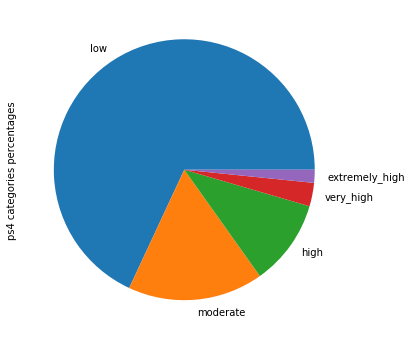

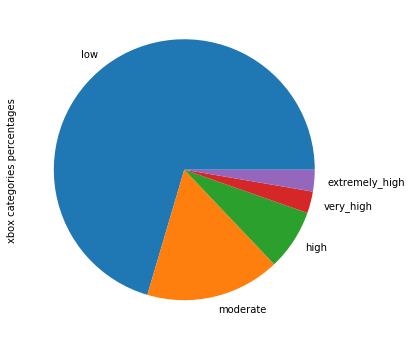

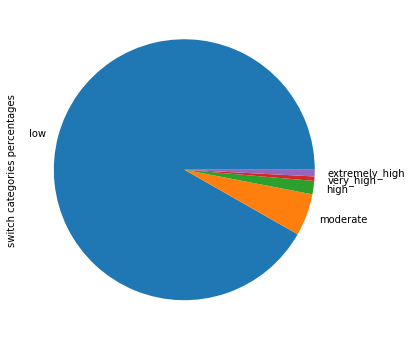

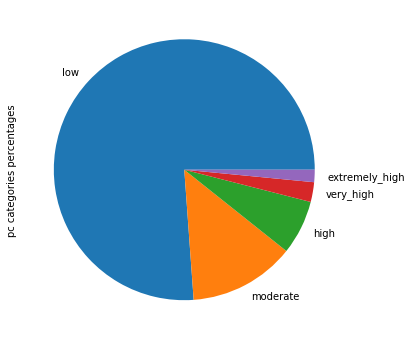

In [26]:
for columnName in category_platform_size:
    platSeries = category_platform_size[columnName]
    platName = platSeries.name
    pieGraph.showPieGraph(platSeries, platName + ' categories percentages', 6, 6)

### Grouped Bar

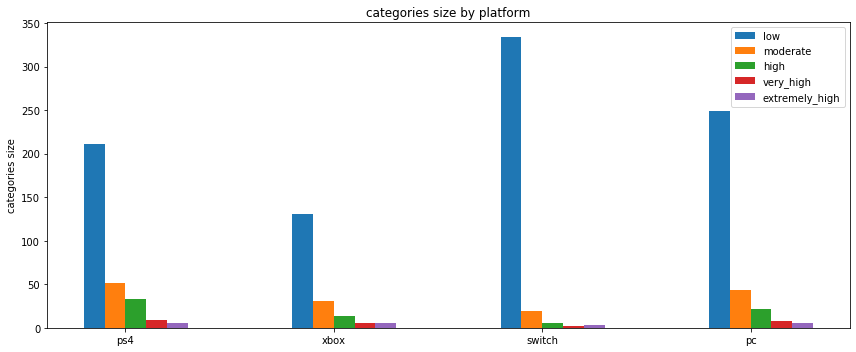

In [27]:
groupedBarsGraph.showGroupedBars(platform_category_size, platformsNames, 'categories size', 'categories size by platform')

### Categorical Heatmap

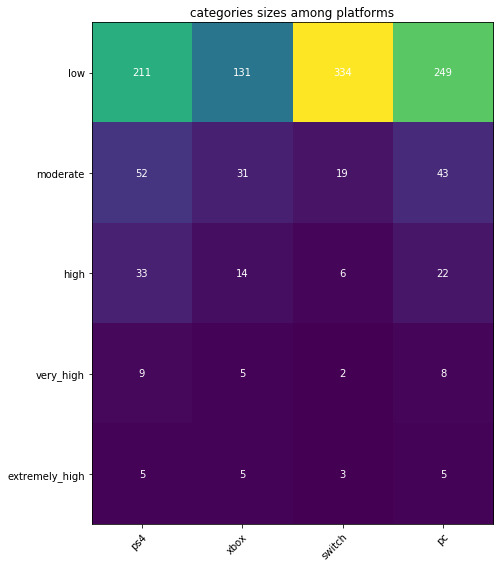

In [28]:
categoricalHeatmapGraph.showCategoricalHeatmap(8, 8, category_platform_size, "categories sizes among platforms")

### Maximum Disparity Between Users and Critics Ratings

In [29]:
platform_df['ps4'].head(20)

,title,user_rating,critic_rating,userCritic_difference,difference_category
93,nba 2k20,9.0,78,69.0,extremely_high
82,fifa 20,11.0,79,68.0,extremely_high
116,madden nfl 20,16.0,76,60.0,extremely_high
79,gravity ghost: deluxe edition,27.0,79,52.0,extremely_high
172,simulacra,21.0,72,51.0,extremely_high
36,mortal kombat 11,33.0,82,49.0,very_high
58,call of duty: modern warfare,32.0,80,48.0,very_high
199,hitman hd enhanced collection,21.0,69,48.0,very_high
217,mxgp 2019,20.0,68,48.0,very_high
224,we. the revolution,20.0,67,47.0,very_high


In [30]:
platform_df['xbox'].head(20)

,title,user_rating,critic_rating,userCritic_difference,difference_category
70,nba 2k20,11.0,80,69.0,extremely_high
74,fifa 20,11.0,79,68.0,extremely_high
75,madden nfl 20,20.0,79,59.0,extremely_high
9,mortal kombat 11,31.0,86,55.0,extremely_high
115,timespinner,23.0,74,51.0,extremely_high
169,wolfenstein: youngblood,20.0,68,48.0,very_high
57,call of duty: modern warfare,37.0,81,44.0,very_high
10,nhl 20,42.0,85,43.0,very_high
143,disney classic games: aladdin and the lion king,30.0,72,42.0,very_high
24,far: lone sails,43.0,84,41.0,very_high


In [31]:
platform_df['pc'].head(20)

,title,user_rating,critic_rating,userCritic_difference,difference_category
203,nba 2k20,11.0,74,63.0,extremely_high
234,fifa 20,11.0,72,61.0,extremely_high
237,madden nfl 20,12.0,72,60.0,extremely_high
77,call of duty: modern warfare,25.0,81,56.0,extremely_high
48,mortal kombat 11,27.0,82,55.0,extremely_high
279,hearthstone: heroes of warcraft - saviors of u...,19.0,68,49.0,very_high
19,the sims 4: realm of magic,37.0,85,48.0,very_high
264,wolfenstein: youngblood,22.0,69,47.0,very_high
383,left alive,86.0,40,46.0,very_high
96,"bury me, my love",34.0,80,46.0,very_high


In [32]:
platform_df['switch'].head(20)

,title,user_rating,critic_rating,userCritic_difference,difference_category
240,nba 2k20,15.0,73,58.0,extremely_high
66,pillars of eternity: complete edition,27.0,82,55.0,extremely_high
94,pokemon sword / shield dual pack,29.0,80,51.0,extremely_high
416,catan,18.0,61,43.0,very_high
123,mortal kombat 11,36.0,78,42.0,very_high
87,pokemon shield,44.0,80,36.0,high
91,pokemon sword,45.0,80,35.0,high
492,fifa 20: legacy edition,9.0,43,34.0,high
476,devil may cry 2,84.0,50,34.0,high
345,giga wrecker alt.,35.0,67,32.0,high


In [33]:
def searchforTitleInPlatform(platformStr_in, game_in):
    tem_df = platform_df[platformStr_in][platform_df[platformStr_in]['title'] == game_in]
    if len(tem_df) == 1:
        return tem_df.iloc[0]
    elif len(tem_df) == 0:
        return -1
    else:
        raise ValueError("unexpected no of games found")
        
searchforTitleInPlatform('xbox', "hitman hd enhanced collection")

title                    hitman hd enhanced collection
user_rating                                         46
critic_rating                                       66
userCritic_difference                               20
difference_category                           moderate
Name: 187, dtype: object

### Minimum Disparity Between Users and Critics

In [34]:
platform_df['ps4'].tail(20)

,title,user_rating,critic_rating,userCritic_difference,difference_category
55,five nights at freddy's vr: help wanted,78.0,80,2.0,low
251,metal wolf chaos xd,62.0,63,1.0,low
201,erica,70.0,69,1.0,low
113,blazing chrome,75.0,76,1.0,low
207,sea of solitude,68.0,69,1.0,low
88,blasphemous,77.0,78,1.0,low
339,where the bees make honey,32.0,31,1.0,low
22,bloodstained: ritual of the night,84.0,83,1.0,low
317,eden-tomorrow,53.0,52,1.0,low
78,knights and bikes,78.0,79,1.0,low


### Games Which Got Higher Ratings From Users Than From Critics

In [35]:
def higherUserRatings(platform_in):
    return platform_df[platform_in][platform_df[platform_in]['user_rating'] > platform_df[platform_in]['critic_rating']].head(10)
    
higherUserRatings('pc')

,title,user_rating,critic_rating,userCritic_difference,difference_category
383,left alive,86.0,40,46.0,very_high
376,paranoia: happiness is mandatory,71.0,47,24.0,moderate
355,little misfortune,80.0,57,23.0,moderate
348,terminator: resistance,82.0,59,23.0,moderate
384,eternity: the last unicorn,61.0,39,22.0,moderate
341,summer catchers,83.0,61,22.0,moderate
365,bannermen,72.0,52,20.0,moderate
374,"i love you, colonel sanders! a finger lickin' ...",68.0,50,18.0,low
344,medieval kingdom wars,77.0,60,17.0,low
302,outbuddies,83.0,66,17.0,low


### Exploratoy Analysis Summary
- NBA, Fifa, Madden, COD: modern warefare games are on top of nearly all platforms lists of maximum disparity between users and professional critics
- Star Wars Jedi: Fallen Order got zero disparity between users and professional critics ratings
- Left Alive is the most praised game by the community not appreciated by professional critics
- Switch games got much lower percentage of high and moderate disparity
- Switch games got a mean of 7 disparity, nearly half of other platforms' disparity which got about 14


___

## A Single Permutation Shuffle Based Trial With Histogram & Probability Density Function
We compare platforms distributions through permutation-test. It is a more systematic approach than relying upon intuition of visualizing and comparing distributions. Given two platforms, We concatenate them into one group. That group's elements are randomly shuffled. Then we divide the group into new two groups. We compare the two distributions of the new two groups and assess whether the insight is still present as in the case of the two original groups of platforms. If the insight is not present in the two new groups, then that would count an evidence on behalf of our hypothesis. That is, The insight (difference in distribution) of original distributions is attributed to the two platforms. In addition, We consider average a p-value of a distribution and utilize it in our test. In Next section, We apply this method iteratively.

### Ensure Series Data are Ascendingly Ordered

In [36]:
print(platform_df['ps4']['userCritic_difference'])
print("")
print(platform_df['switch']['userCritic_difference'])

93     69.0
82     68.0
116    60.0
79     52.0
172    51.0
       ... 
198     0.0
330     0.0
214     0.0
76      0.0
56      0.0
Name: userCritic_difference, Length: 310, dtype: float64

240    58.0
66     55.0
94     51.0
416    43.0
123    42.0
       ... 
443     0.0
89      0.0
106     0.0
53      0.0
208     0.0
Name: userCritic_difference, Length: 364, dtype: float64


### PS4 Distribution

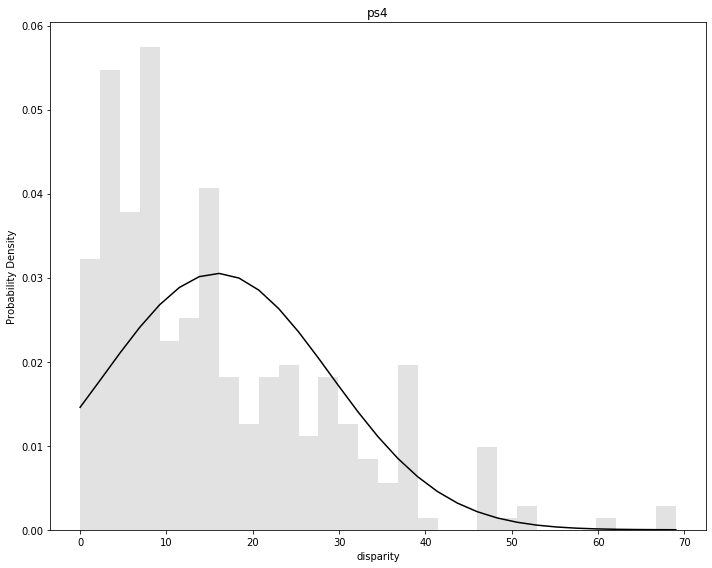

In [37]:
histogramPdfGraph.showHistPdf(platform_df['ps4']['userCritic_difference'], 30, '#e3e2e2', 'black', 'disparity', 'ps4', 10, 8)

### Average of PS4's Disparity

In [38]:
platform_df['ps4']['userCritic_difference'].mean()

15.893548387096773

### Switch Distribution

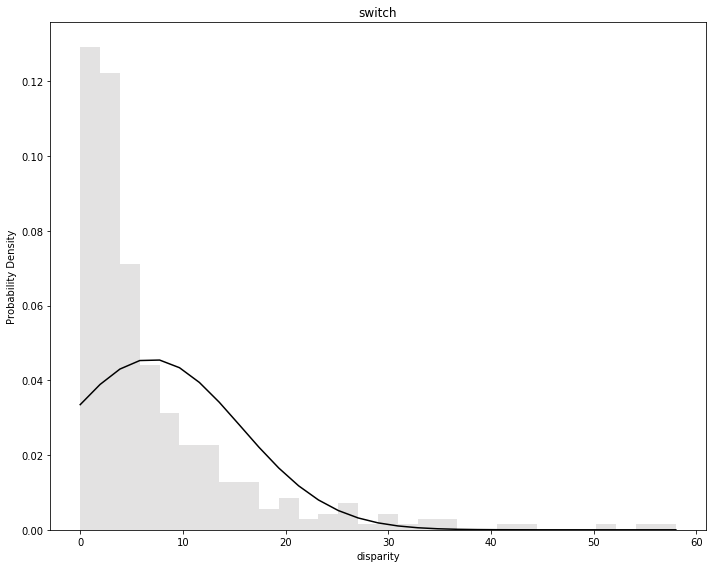

In [39]:
histogramPdfGraph.showHistPdf(platform_df['switch']['userCritic_difference'], 30, '#e3e2e2', 'black', 'disparity', 'switch', 10, 8)

### Average of Switch Disparity

In [40]:
platform_df['switch']['userCritic_difference'].mean()

6.876373626373627

### Conclusion
- The difference between _ps4_ and _switch_ distributions is notable
- The difference between _ps4_ and _switch_ means is about 9

### Concatenate Both PS4 and Switch

In [41]:
bothGroups = pd.concat([platform_df['switch']['userCritic_difference'], platform_df['ps4']['userCritic_difference']])

### Shuffle and Divide

In [42]:
# permutation based shuffling
rng = np.random.default_rng()
bothGroups = rng.permutation(bothGroups)
# divide into two groups
firstGroup = bothGroups[:int(len(bothGroups)/2)]
secondGroup = bothGroups[int(len(bothGroups)/2):]

### First Group Distribution

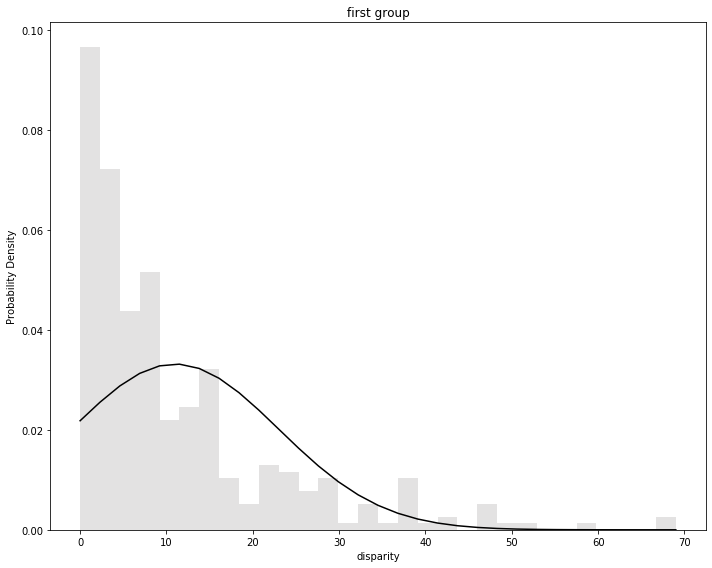

In [43]:
histogramPdfGraph.showHistPdf(firstGroup, 30, '#e3e2e2', 'black', 'disparity', 'first group', 10, 8)

### First Group Average

In [44]:
firstGroup.mean()

11.0

### Second Group Distribution

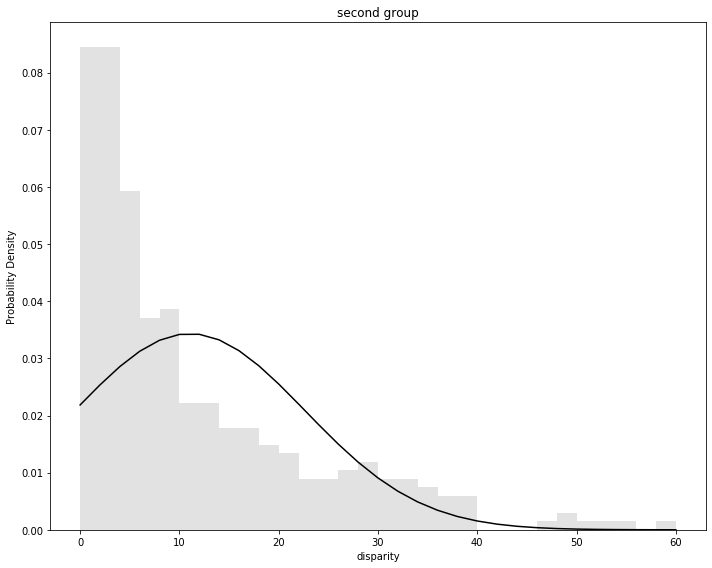

In [45]:
histogramPdfGraph.showHistPdf(secondGroup, 30, '#e3e2e2', 'black', 'disparity', 'second group', 10, 8)

### Second Group Average

In [46]:
secondGroup.mean()

11.047477744807122

### Conclusion
- The difference between first and second groups distributions is not notable alike ps4 and switch
- The difference between first and second groups means is much less than disparity between ps4 and switch distributions

___

## Permutation Test and P-Value Based Statistical Significance
We apply the above method iteratively. The more tests, The more confident we are of our hypothesis. That is, The pattern of two distributions is attributed to the difference in two platforms.

In [47]:
# computes average of a list
def avgOfList(list_in):
    return pd.Series(list_in).mean()

In [48]:
# loop on pairs of platforms
for idx, platformName in enumerate(platformsNames):
    for idx_, platformName_ in enumerate(platformsNames):
        # compare only unique pairs
        if idx_ > idx:
            # print pairs of platforms which are compared
            print(platformName, platformName_)
            # apply test for 25 iterations on first and second platforms of the nested loop
            testResults = permTest.permutationTest(25, platform_df[platformName]['userCritic_difference'], platform_df[platformName_]['userCritic_difference'])
            # print results average
            print(avgOfList(testResults))
            print("")

ps4 xbox
0.6639999999999998

ps4 switch
8.21812431561929

ps4 pc
1.5160265239233675

xbox switch
7.010956187898123

xbox pc
0.5826510174543579

switch pc
6.286296818538614



### Conclusion
- switch has greatest statistical significance in comparison with other platforms

### Systematic Test Summary
- For _ps4_ and _switch_, The difference between distributions and means is notable
- For the two randomly generated, through shuffling, groups, The difference between distributions and means is not notable alike original _ps4_ and _switch_
- The disappearance of noted pattern in the two randomly generated groups counts as an evidence of our hypothesis. That is, the pattern (difference) of _switch_ and _ps4_ distributions is attributed to platforms factor.
- Switch has greatest statistical significance in comparison with other platforms